In [71]:
# this script is used to Build a word cloud of most used words and phrases by ChatGPT along with some cool visualizations

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [73]:
df = pd.read_excel('data/ieee-chatgpt-generation.xlsx')
df.to_csv('data/data.csv', index=False)

In [74]:
df.head()

Unnamed: 0.1  Unnamed: 0       id  \
0             0           0  8600003   
1             1           1  8600004   
2             2           2  8600008   
3             3           3  8600013   
4             4           4  8600014   

                                               title  \
0  An Improved Variable-Node-Based BP Decoding Al...   
1  Mobile Robot Location Algorithm Based on Impro...   
2  Vertical Handoff Decision Algorithm for Hetero...   
3  Robust offline trained neural network for TDOA...   
4  Gaussian MAC with Feedback and Strictly Causal...   

                                             keyword  \
0  "Flash memories","Reliability","Decoding","Par...   
1  "Sociology","Statistics","Simultaneous localiz...   
2  "Entropy","Handover","Wireless networks","Deci...   
3  "Microphones","Artificial neural networks","Po...   
4  "Encoding","Transmitters","Decoding","Indexes"...   

                                            abstract  
0  The reliability of flash memories is highly de...  
1  This paper proposes an improved particle filte...  
2  This paper proposes a novel algorithm for vert...  
3  This paper proposes a robust offline trained n...  
4  This paper proposes a method for encoding and ...

In [75]:
# keep id, title, keyword and abstract columns. Drop the rest
df = df[['title', 'keyword', 'abstract']]
df.head()

title  \
0  An Improved Variable-Node-Based BP Decoding Al...   
1  Mobile Robot Location Algorithm Based on Impro...   
2  Vertical Handoff Decision Algorithm for Hetero...   
3  Robust offline trained neural network for TDOA...   
4  Gaussian MAC with Feedback and Strictly Causal...   

                                             keyword  \
0  "Flash memories","Reliability","Decoding","Par...   
1  "Sociology","Statistics","Simultaneous localiz...   
2  "Entropy","Handover","Wireless networks","Deci...   
3  "Microphones","Artificial neural networks","Po...   
4  "Encoding","Transmitters","Decoding","Indexes"...   

                                            abstract  
0  The reliability of flash memories is highly de...  
1  This paper proposes an improved particle filte...  
2  This paper proposes a novel algorithm for vert...  
3  This paper proposes a robust offline trained n...  
4  This paper proposes a method for encoding and ...

In [76]:
# check for null values
df.isnull().sum()

title       0
keyword     0
abstract    0
dtype: int64

In [77]:
# get the keywords
keywords = [kw.strip('"') for row in df['keyword'] for kw in row.split(',')]
print("Length: ", len(keywords))
print(keywords[:5])

Length:  101159
['Flash memories', 'Reliability', 'Decoding', 'Parity check codes', 'Convergence']


In [78]:
# convert to lowercase and store only unique keywords
keywords = list(set([kw.lower() for kw in keywords]))
print("Length: ", len(keywords))

print("Top 10 Keywords:")
for kw in keywords[:10]: print(kw)

Length:  3484
Top 10 Keywords:
urban areas
uplink
set theory
solar panels
authoring systems
formal verification
minerals
mesh generation
rescue robots
loaded antennas


In [89]:
# store all the abstracts in a single string
all_abstracts = ' '.join([str(abs) for abs in df['abstract']])

In [80]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")

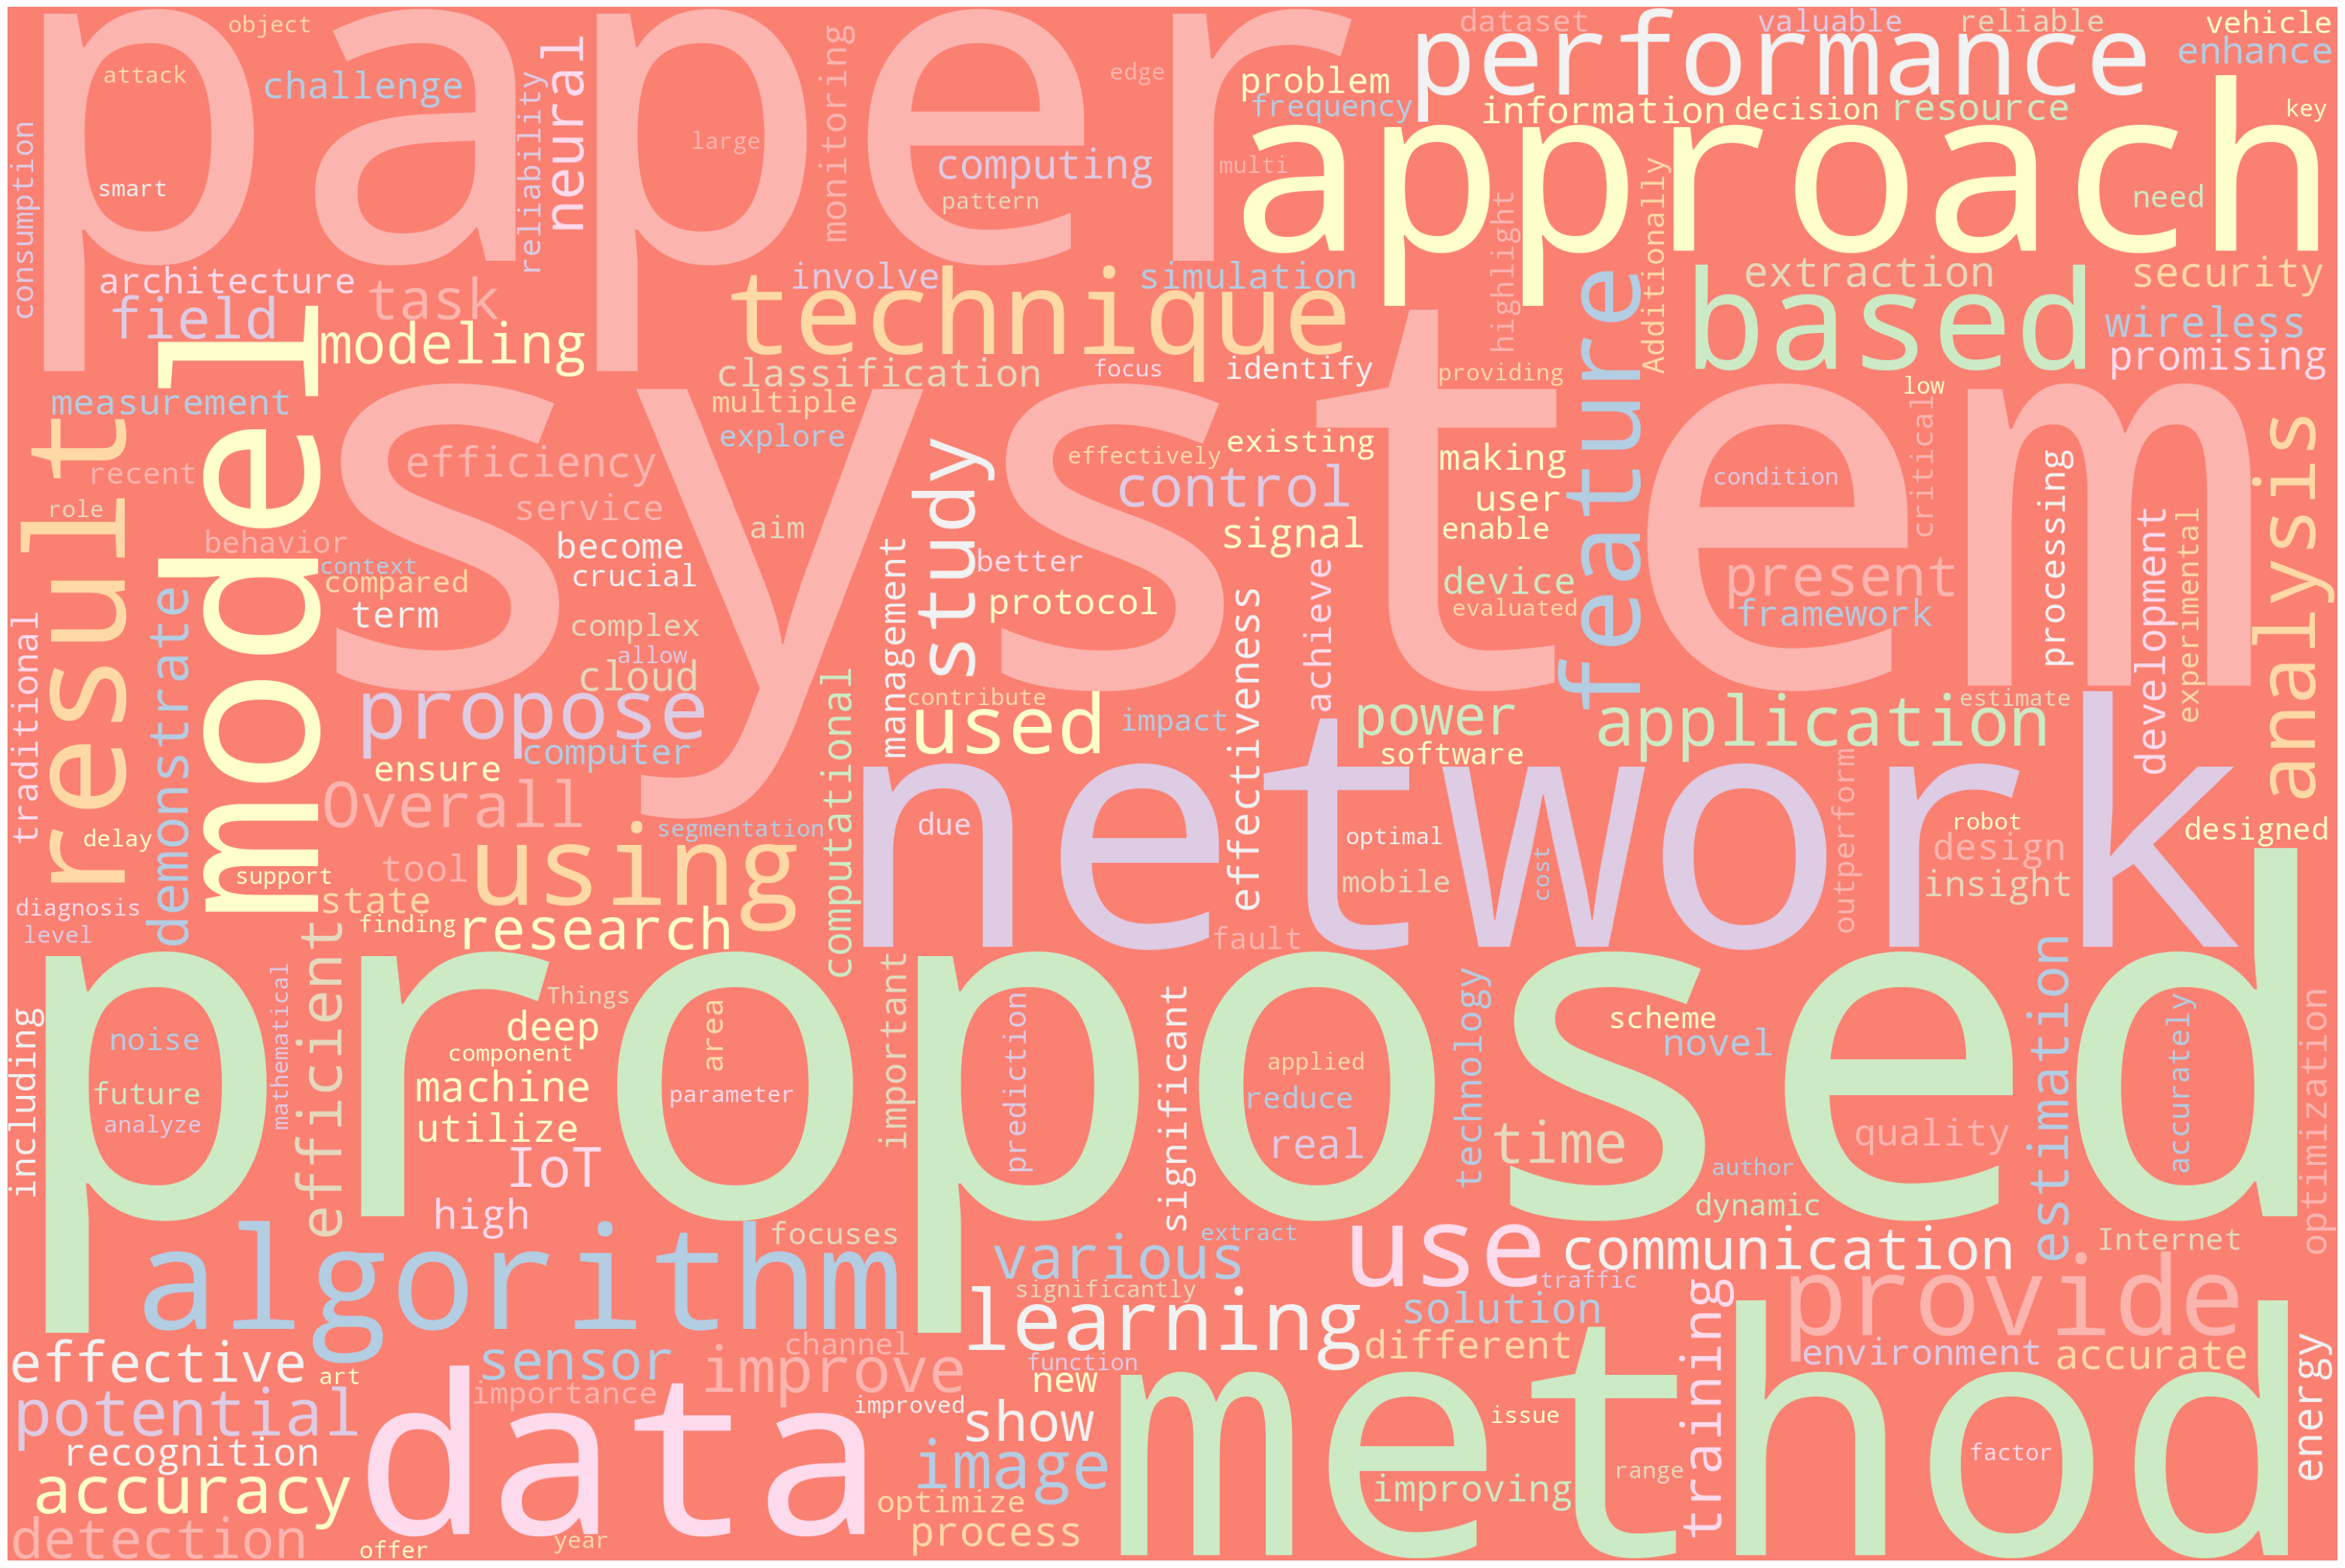

In [90]:

# Generate word cloud
wordcloud = WordCloud(width= 3000, height = 2000, random_state=10, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(all_abstracts)
# Plot
plot_cloud(wordcloud)

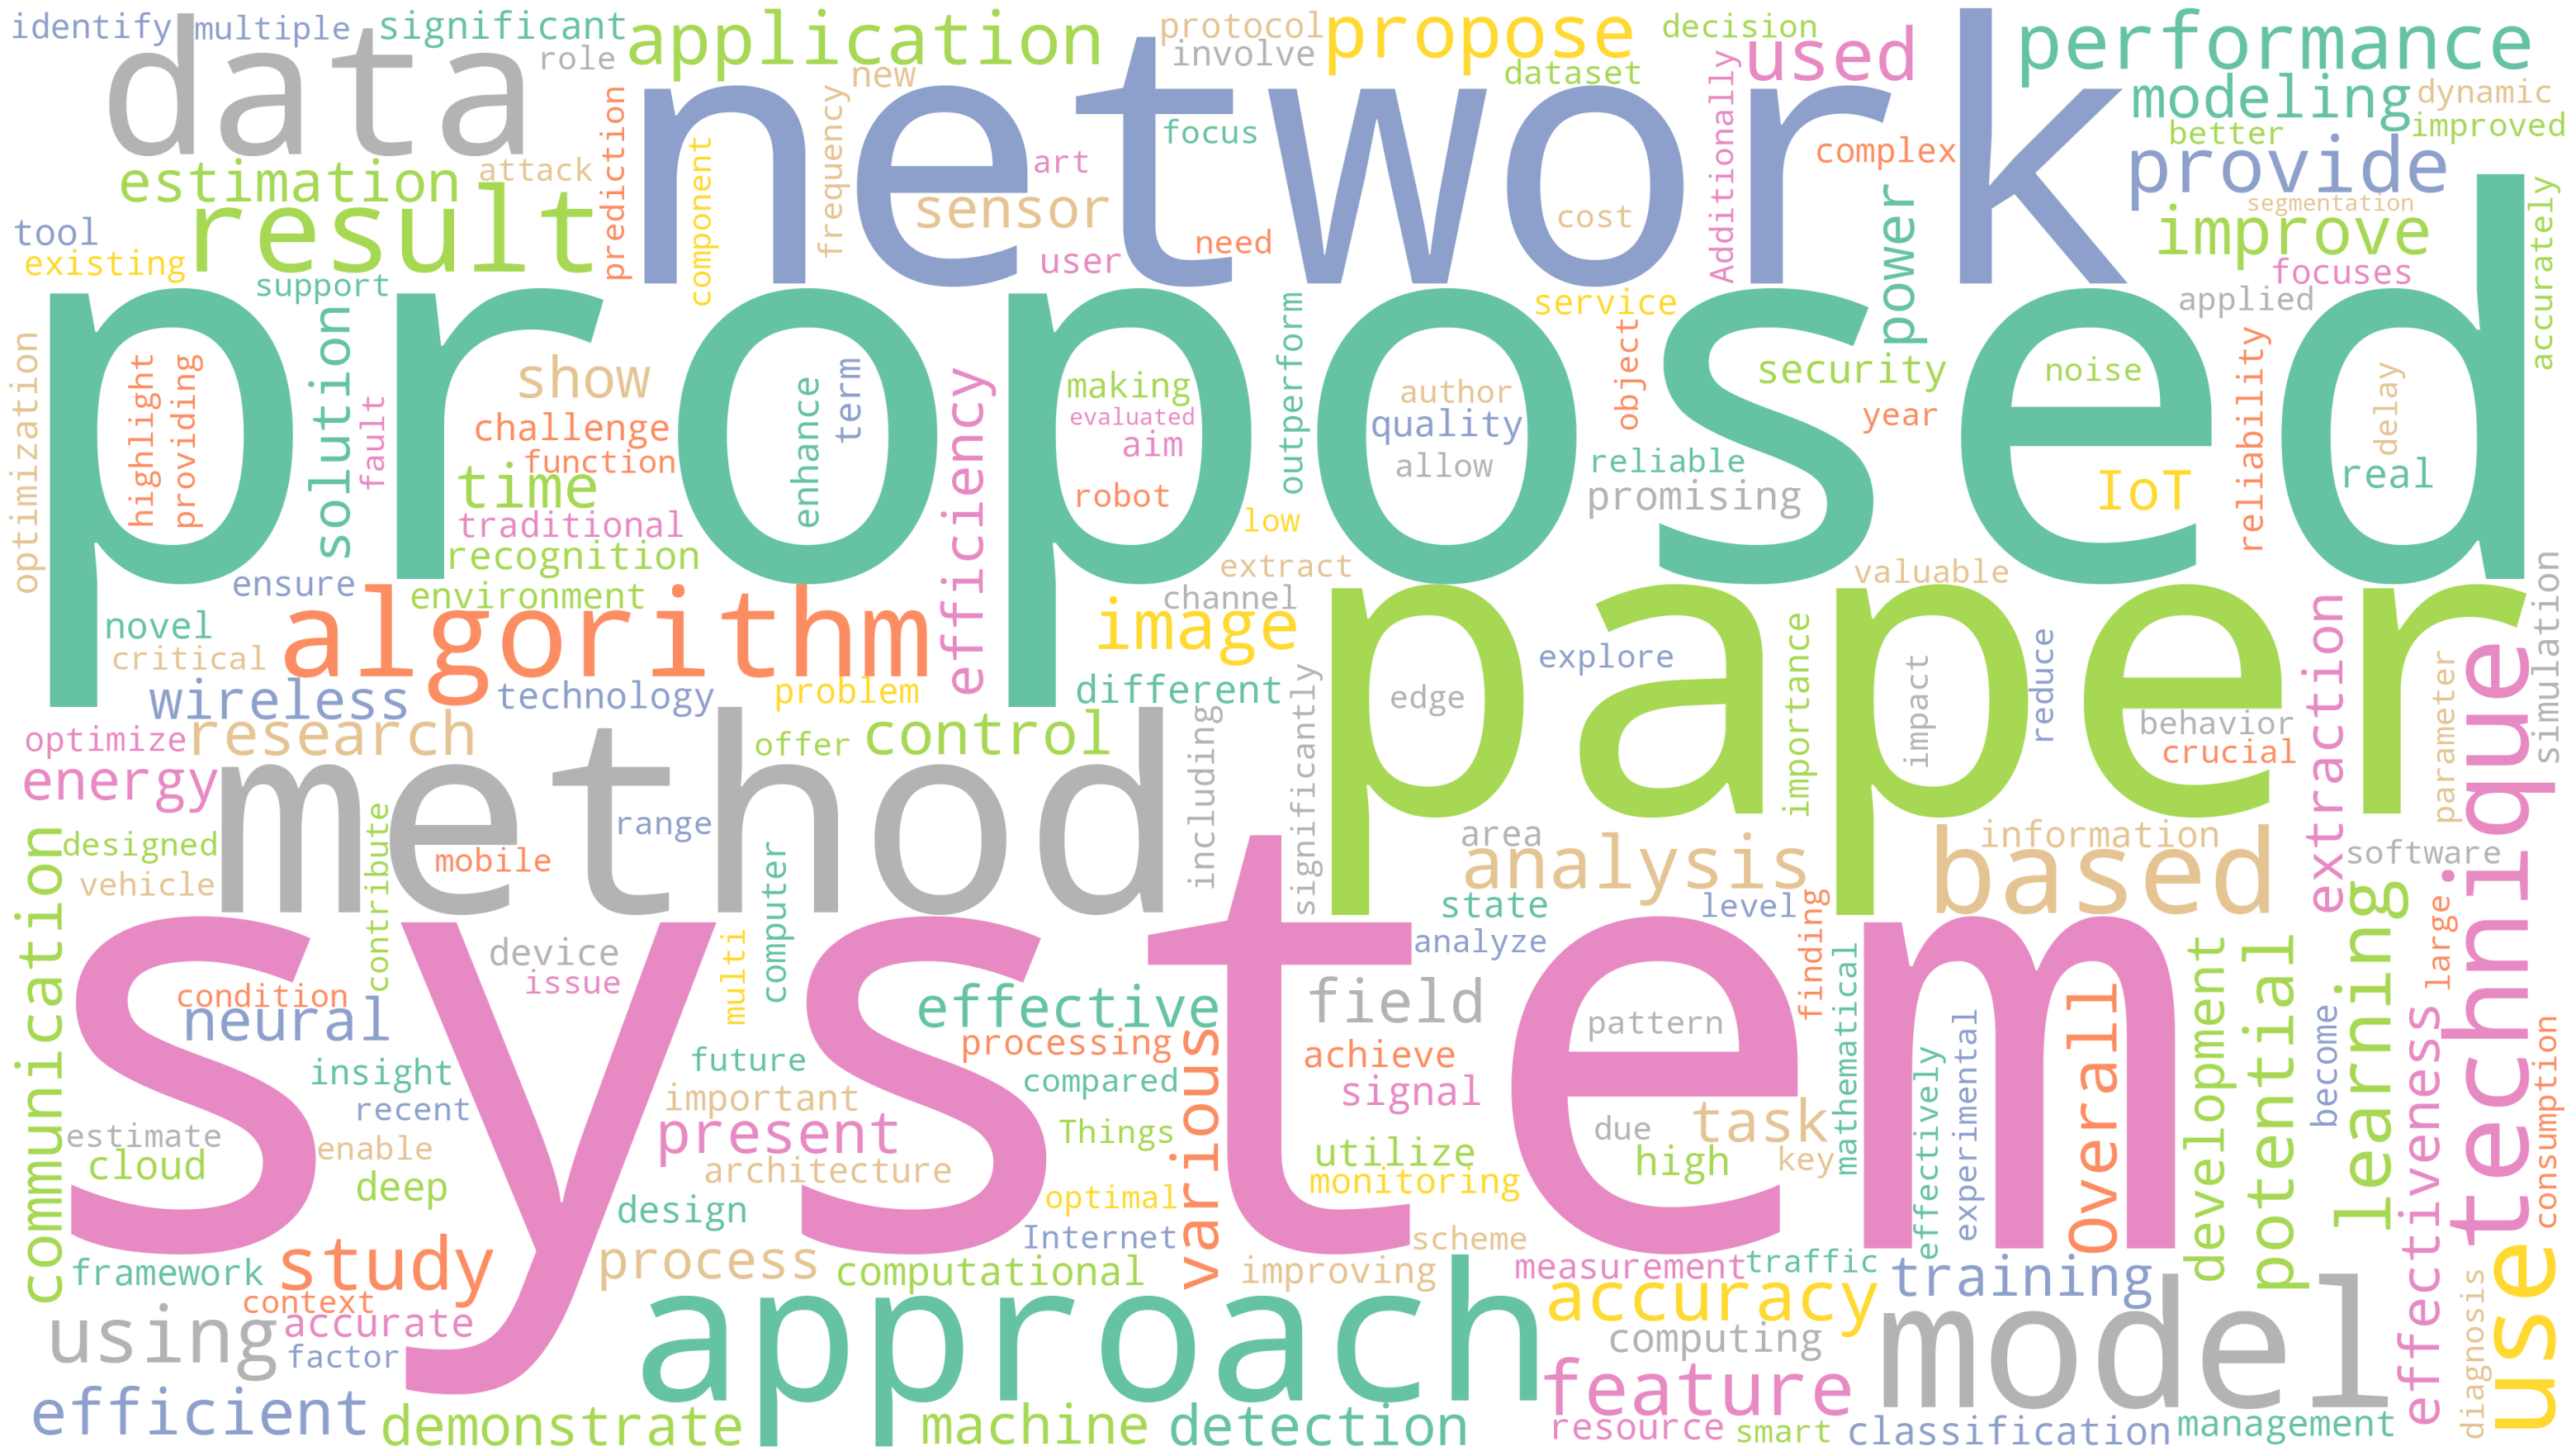

In [104]:
# Import packages
import numpy as np
from PIL import Image
# Import image to np.array
cc_mask = np.array(Image.open('ChatGPT_logo.svg.png'))
# Generate wordcloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = STOPWORDS, mask=mask).generate(all_abstracts)
# Plot
plot_cloud(wordcloud)

In [87]:
def get_abstracts_with_keyword(df, keyword):
    abstracts = []

    # iterate through and store the abstracts for the rows that contain the word 'Mineral' in the column keyword
    for index, row in df.iterrows():
        if 'mineral' in row['keyword'].lower():
            abstracts.append(row['abstract'])

    # store all the abstracts in a single string
    text = ' '.join([str(abs) for abs in abstract_minerals])

    return text


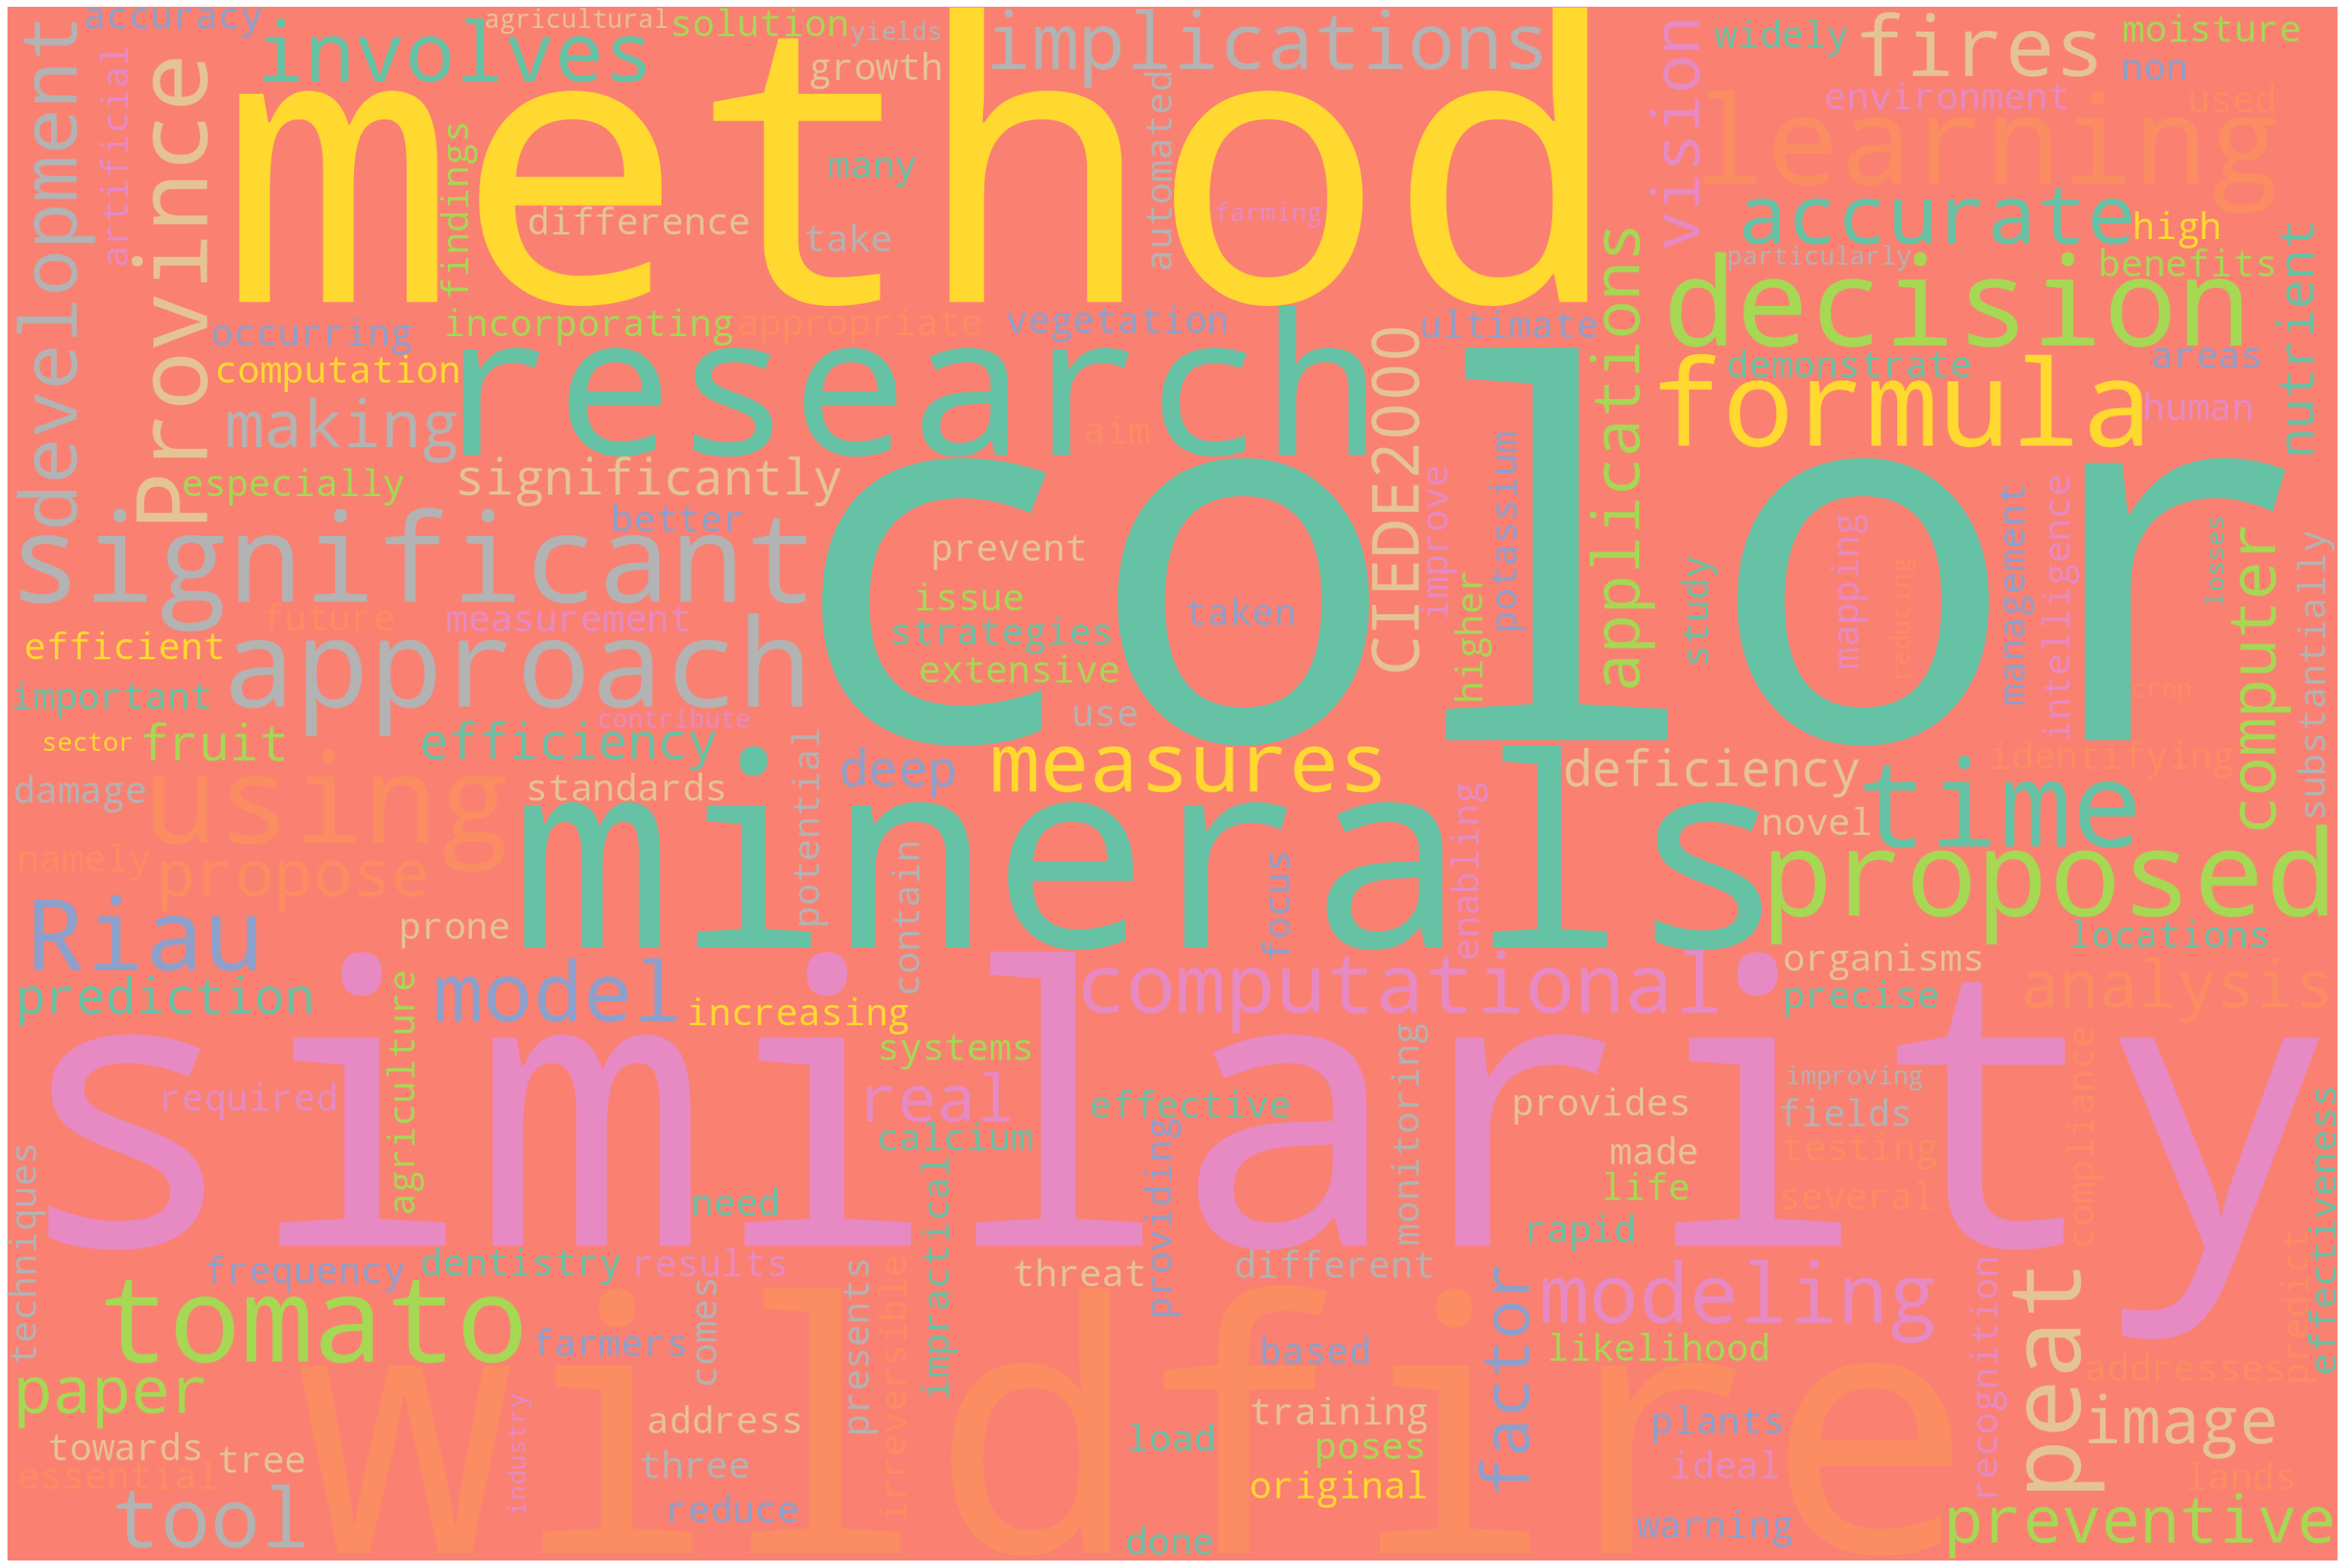

In [88]:
text = get_abstracts_with_keyword(df, 'mineral')

# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Set2', collocations=False, stopwords = STOPWORDS).generate(text)
# Plot
plot_cloud(wordcloud)


In [131]:
import nltk
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import re
import matplotlib.pyplot as plt

# Download necessary NLTK data
# nltk.download('punkt')
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# Preprocess text: lowercasing, punctuation removal, stopword removal, lemmatization
def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize
    tokens = nltk.word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    domain_specific_stopwords = [
    'study','paper', 'novel', 'approach', 'method', 'result', 'show', 
    'demonstrate', 'proposed', 'introduced', 'work', 'finding', 
    'analysis', 'significant', 'effectiveness', 'present', 'outperforms'
    ]
    # Add domain-specific stopwords
    stop_words.update(domain_specific_stopwords)
    tokens = [word for word in tokens if word not in domain_specific_stopwords]

    # Lemmatize
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return tokens

# Extract n-grams from preprocessed tokens
def get_ngrams(tokens, n):
    return list(ngrams(tokens, n))

# Plot top n-grams
def plot_ngrams(ngram_list, n, top_n=10):
    # Count the n-grams
    ngram_counts = Counter(ngram_list)

    # Get the most common n-grams
    common_ngrams = ngram_counts.most_common(top_n)

    # Prepare the n-grams for plotting
    ngrams, counts = zip(*common_ngrams)
    ngrams = [' '.join(gram) for gram in ngrams]  # Join n-grams into readable strings

    # Plot the n-grams
    plt.figure(figsize=(10, 6))
    plt.barh(ngrams, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-grams')
    plt.title(f'Top {top_n} {n}-grams')
    plt.gca().invert_yaxis()  # Highest frequency at the top
    plt.show()

# Full analysis function: preprocess, extract, and plot n-grams
def analyze_ngrams(text, n, top_n=10):
    tokens = preprocess_text(text)
    ngram_list = get_ngrams(tokens, n)
    plot_ngrams(ngram_list, n, top_n)

    




Plotting 2-grams:


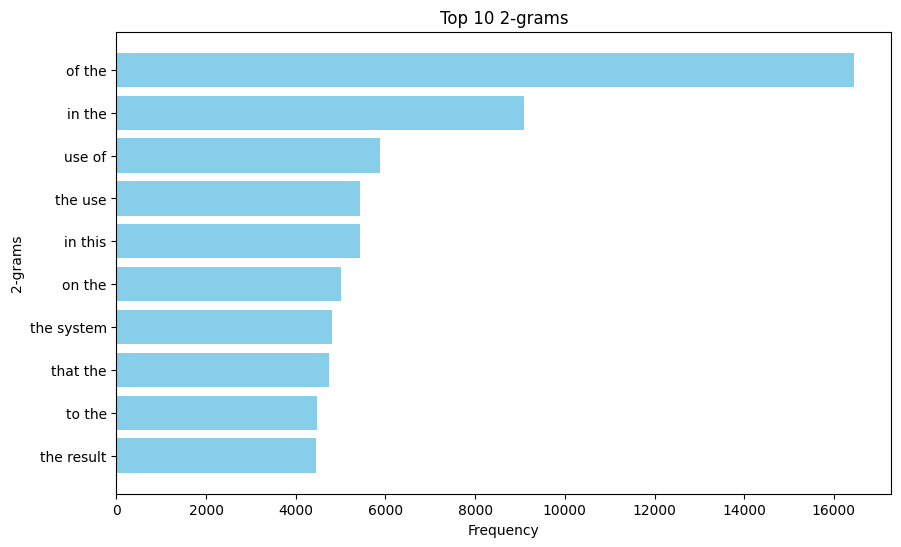

In [132]:
# Plot 2-grams and 3-grams
print("Plotting 2-grams:")
analyze_ngrams(all_abstracts, 2, top_n=10)  # For 2-grams

In [138]:
import pandas as pd

huggingface_df = pd.read_json("hf://datasets/hannxu/hc_var/hc_var.jsonl", lines=True)

/Users/naveenmalla/Documents/Projects/ChatGPT_WordCloud/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [139]:
huggingface_df.head()

text  label domain  topic  \
0  In a letter to parents, Plymstock School in De...      0   news  world   
1  Police believe Jaber al-Bakr, also a Syrian, w...      0   news  world   
2  The commission is expected to determine how ma...      0   news  world   
3  The jihadist group's self-styled news agency p...      0   news  world   
4  The driver died in the incident. Police found ...      0   news  world   

  prompt  pp_id  
0    N/A      0  
1    N/A      0  
2    N/A      0  
3    N/A      0  
4    N/A      0

In [140]:
# get all the rows where label is '1'
chatgpt_df = huggingface_df[huggingface_df['label'] == 1]

chatgpt_df.head()

text  label domain  topic  \
10000  Venezuelan President Hugo Chavez has managed t...      1   news  world   
10001  Thousands of South Koreans took to the streets...      1   news  world   
10002  Venezuelan President Hugo Chavez has managed t...      1   news  world   
10003  Hotel heiress Nicky Hilton surprised everyone ...      1   news  world   
10004  On Monday, a suspicious white powder was disco...      1   news  world   

                                                  prompt  pp_id  
10000  Write a 150 words article following the summar...      1  
10001  Write a 150 words article following the summar...      1  
10002  Write a 150 words article following the summar...      1  
10003  Write a 150 words article following the summar...      1  
10004  Write a 150 words article following the summar...      1

In [141]:
chatgpt_df.topic.unique()

array(['world', 'sports', 'business', 'yelp', 'imdb', 'ivy', 'medical',
       'finance', 'history', 'science'], dtype=object)